In [1]:
import pandas as pd
import seaborn as sns
from __future__ import print_function

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
data = pd.concat([train, test])

In [3]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [4]:
data.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
413,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
414,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
415,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
416,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309
417,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668


In [5]:
# Check null values
print ('Null Age =', data['Age'].isnull().values.ravel().sum())
print ('Null Cabin =', data['Cabin'].isnull().values.ravel().sum())
print ('Null Embarked =', data['Embarked'].isnull().values.ravel().sum())
print ('Null Fare =', data['Fare'].isnull().values.ravel().sum())
print ('Null Name =', data['Name'].isnull().values.ravel().sum())
print ('Null Pclass =', data['Pclass'].isnull().values.ravel().sum())
print ('Null SibSp =', data['SibSp'].isnull().values.ravel().sum())
print ('Null Parch =', data['Parch'].isnull().values.ravel().sum())
print ('Null Sex =', data['Sex'].isnull().values.ravel().sum())
print ('Null Ticket =', data['Ticket'].isnull().values.ravel().sum())

Null Age = 263
Null Cabin = 1014
Null Embarked = 2
Null Fare = 1
Null Name = 0
Null Pclass = 0
Null SibSp = 0
Null Parch = 0
Null Sex = 0
Null Ticket = 0


In [6]:
# Extract person title from Name column
data['Title'] = data['Name'].apply(lambda s: s[s.find(',')+1:s.find('.')].strip())

In [7]:
data['Title'].isnull().values.ravel().sum() # count null values on Title column

0

In [8]:
data['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Mlle              2
Ms                2
Mme               1
the Countess      1
Don               1
Lady              1
Sir               1
Jonkheer          1
Dona              1
Capt              1
Name: Title, dtype: int64

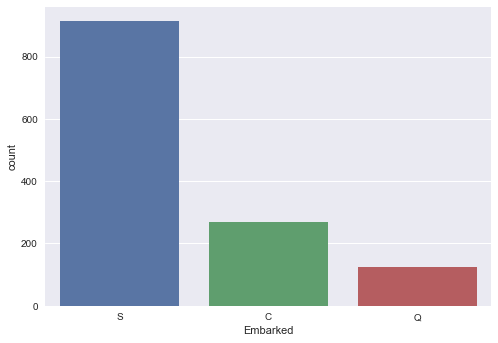

In [9]:
sns.countplot(data['Embarked'])
sns.plt.show()

In [10]:
data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [11]:
data['Embarked'] = data['Embarked'].fillna('S') # fill empty Embarked with most common value

data['Embarked'].value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

In [12]:
# Create a dataframe of dummy variables for each distinct value of 'Embarked'
dummies_df = pd.get_dummies(data=data['Embarked'], prefix='Embarked')

# Add the new variables back to the original data set
data = pd.concat([data, dummies_df], axis=1)

del dummies_df

In [13]:
data = data.drop('Embarked', axis=1)
data.head()

,Age,Cabin,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Embarked_C,Embarked_Q,Embarked_S
0,22.0,NaN,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,0,0,1
1,38.0,C85,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,1,0,0
2,26.0,NaN,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0,0,1
3,35.0,C123,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,0,0,1
4,35.0,NaN,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,0,0,1


In [14]:
# Create a dataframe of dummy variables for each distinct value of 'Title'
dummies_df = pd.get_dummies(data=data['Title'], prefix='Title')

# Add the new variables back to the original data set
data = pd.concat([data, dummies_df], axis=1)

del dummies_df

In [15]:
data.head()

,Age,Cabin,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,22.0,NaN,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,...,0,0,0,0,1,0,0,0,0,0
1,38.0,C85,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,...,0,0,0,0,0,1,0,0,0,0
2,26.0,NaN,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,...,0,1,0,0,0,0,0,0,0,0
3,35.0,C123,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,...,0,0,0,0,0,1,0,0,0,0
4,35.0,NaN,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,...,0,0,0,0,1,0,0,0,0,0


In [16]:
data = data.drop(['Name', 'Title', 'Ticket', 'Cabin'], axis=1)
data.columns

Index([u'Age', u'Fare', u'Parch', u'PassengerId', u'Pclass', u'Sex', u'SibSp',
       u'Survived', u'Embarked_C', u'Embarked_Q', u'Embarked_S', u'Title_Capt',
       u'Title_Col', u'Title_Don', u'Title_Dona', u'Title_Dr',
       u'Title_Jonkheer', u'Title_Lady', u'Title_Major', u'Title_Master',
       u'Title_Miss', u'Title_Mlle', u'Title_Mme', u'Title_Mr', u'Title_Mrs',
       u'Title_Ms', u'Title_Rev', u'Title_Sir', u'Title_the Countess'],
      dtype='object')

In [17]:
data['Sex'] = data['Sex'] == 'male'

In [18]:
data.loc[ data['Pclass'] == 3 ]['Fare'].describe()

count    708.000000
mean      13.302889
std       11.494358
min        0.000000
25%        7.750000
50%        8.050000
75%       15.245800
max       69.550000
Name: Fare, dtype: float64

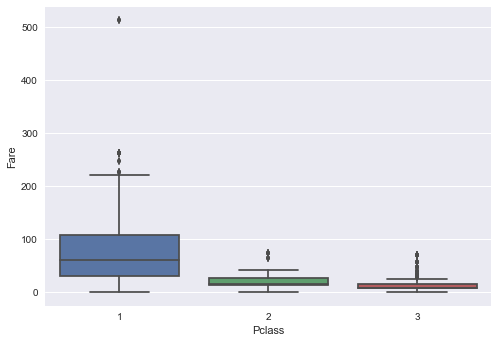

In [19]:
sns.boxplot(x='Pclass', y='Fare', data=data)
sns.plt.show()

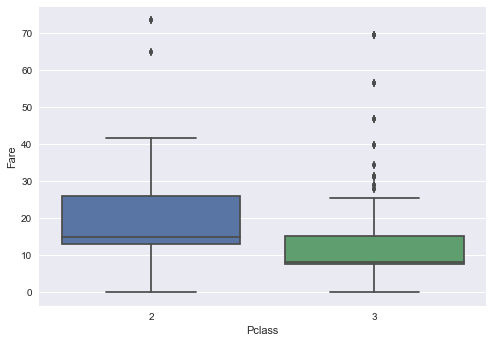

In [20]:
sns.boxplot(x='Pclass', y='Fare', data=data.loc[ (data['Pclass'] == 3) | (data['Pclass'] == 2) ])
sns.plt.show()

In [21]:
data['Fare'].fillna((data['Fare'].mean()), inplace=True)

print ('Null Fare =', data['Fare'].isnull().values.ravel().sum())

Null Fare = 0


In [22]:
from sklearn.ensemble import RandomForestRegressor

age_df = data.drop(['PassengerId', 'Survived'], axis=1)

knownAge = age_df.loc[ (data.Age.notnull()) ]
unknownAge = age_df.loc[ (data.Age.isnull()) ]

y = knownAge['Age']                # target
X = knownAge.drop(['Age'], axis=1) # features

rtr = RandomForestRegressor(n_estimators=30)
rtr.fit(X, y)

predictedAges = rtr.predict(unknownAge.drop(['Age'], axis=1))
data.loc[ (data.Age.isnull()), 'Age' ] = predictedAges

In [23]:
print ('Null Age =', data['Age'].isnull().values.ravel().sum())

Null Age = 0


In [24]:
data['Age'].describe()

count    1309.000000
mean       29.805435
std        13.605612
min         0.170000
25%        21.386111
50%        28.000000
75%        38.000000
max        80.000000
Name: Age, dtype: float64

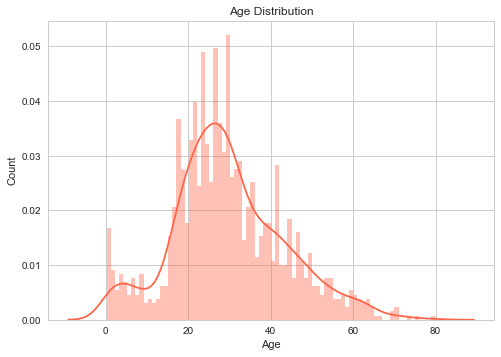

In [25]:
sns.set_style("whitegrid")
sns.distplot(data['Age'], bins=80, color='tomato')
sns.plt.title("Age Distribution")
sns.plt.ylabel("Count")
sns.plt.show()

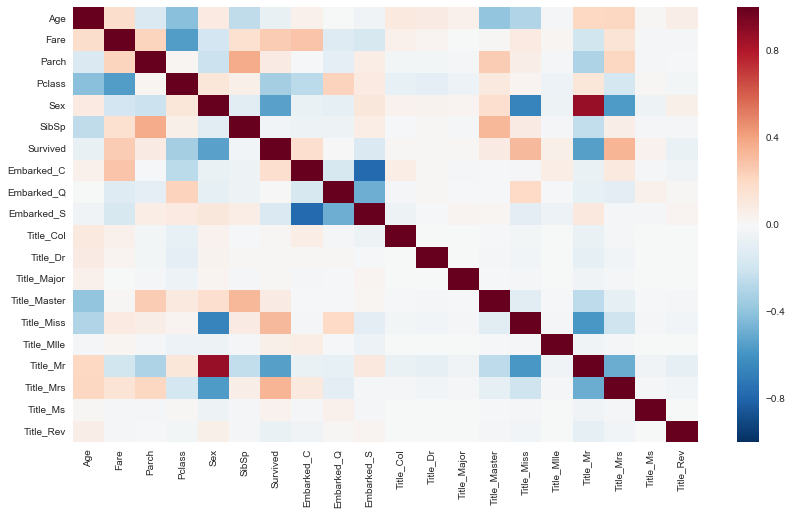

In [26]:
sns.plt.figure(figsize=(14,8))
sns.heatmap(data.drop(['PassengerId', 'Title_the Countess', 'Title_Capt', 'Title_Dona', 'Title_Lady', 'Title_Don', 'Title_Jonkheer', 'Title_Mme', 'Title_Sir'], axis=1).corr())
sns.plt.show()

In [27]:
data.drop(['PassengerId', 'Survived'], axis=1).columns

Index([u'Age', u'Fare', u'Parch', u'Pclass', u'Sex', u'SibSp', u'Embarked_C',
       u'Embarked_Q', u'Embarked_S', u'Title_Capt', u'Title_Col', u'Title_Don',
       u'Title_Dona', u'Title_Dr', u'Title_Jonkheer', u'Title_Lady',
       u'Title_Major', u'Title_Master', u'Title_Miss', u'Title_Mlle',
       u'Title_Mme', u'Title_Mr', u'Title_Mrs', u'Title_Ms', u'Title_Rev',
       u'Title_Sir', u'Title_the Countess'],
      dtype='object')

In [28]:
data.drop(['PassengerId', 'Survived'], axis=1).isnull().values.any()

False

In [29]:
train = data.loc[ data['Survived'].notnull() ]

In [30]:
from sklearn.ensemble import RandomForestClassifier

features_list = data.columns.drop(['PassengerId', 'Survived'])
X = train.drop(['PassengerId', 'Survived'], axis=1).values
y = train['Survived'].values

forest = RandomForestClassifier(n_estimators=100)
forest.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [31]:
train.head()

,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Embarked_C,Embarked_Q,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,22.0,7.2500,0,1,3,True,1,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,38.0,71.2833,0,2,1,False,1,1.0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,26.0,7.9250,0,3,3,False,0,1.0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,35.0,53.1000,0,4,1,False,1,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,35.0,8.0500,0,5,3,True,0,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [32]:
test = data.loc[ data['Survived'].isnull() ]

In [33]:
test.head()

,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Embarked_C,Embarked_Q,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,34.5,7.8292,0,892,3,True,0,NaN,0,1,...,0,0,0,0,1,0,0,0,0,0
1,47.0,7.0000,0,893,3,False,1,NaN,0,0,...,0,0,0,0,0,1,0,0,0,0
2,62.0,9.6875,0,894,2,True,0,NaN,0,1,...,0,0,0,0,1,0,0,0,0,0
3,27.0,8.6625,0,895,3,True,0,NaN,0,0,...,0,0,0,0,1,0,0,0,0,0
4,22.0,12.2875,1,896,3,False,1,NaN,0,0,...,0,0,0,0,0,1,0,0,0,0


In [34]:
test['Survived'] = map(int, forest.predict(test.drop(['PassengerId', 'Survived'], axis=1).values))

C:\Users\LCalzavara\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [35]:
test.to_csv('output.csv', columns=['PassengerId', 'Survived'], index=False)